#### Ejercicio 4


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def mesh(a, b, Nt):
    """
    Requiere 3 parametros:
    a (float): Tiempo inicial en segundos
    b (float): Tiempo final en segundos
    Nt (int): Número de pasos o puntos
    
    Regresa una nueva variable:
    ht (float): tamaño del paso"""
    
    ht = (b-a) / Nt
    return ht

def f(t, y):
    """
    Toma dos parámetros:
    
    t (array): vector de tiempo
    y (array): función primaria
    
    Regresa un arreglo (array) """
    
    
    return y - t**2 + 1

def Exacta(t):
    """
    Requiere un parámetro:
    t (array): vector de tiempo
    
    Regresa un nuevo arreglo(array): solucion exacta"""
    return (t+1)**2 - 0.5*np.exp(t)

def Euler(f, t, w, ht):
    """
    Requiere 4 parámetros:
    f (function): función f con sus respectivos parámetros
    t (array): arreglo de tiempo
    w (array): arreglo de ceros de tamaño Nt+1
    ht (float): paso del tiempo calculado con funcion ht
    
    No regresa nada, modifica los arreglos dados, tanto el de tiempo como el de la función"""
    for i, val in enumerate(w[0:-1]):
        w[i +1] = w[i] + ht * f(t[i], w[i])
        t[i +1] = t [0] + (i +1) * ht
        
def RK2(f, t, w, ht):
    """
    Requiere 4 parámetros:
    f (function): función f con sus respectivos parámetros
    t (array): arreglo de tiempo
    w (array): arreglo de ceros de tamaño Nt+1
    ht (float): paso del tiempo calculado con funcion ht
    
    No regresa nada, modifica los arreglos dados, tanto el de tiempo como el de la función"""
    for i, val in enumerate(w[0:-1]):
        k1 = ht * f(t[i], w[i])
        w[i+1] = w[i] + ht * f(t[i] + ht * 0.5, w[i] + k1 * 0.5)
        t[i+1] = a + (i+1) * ht

def RK3(f, t, w, ht):
    """
    Requiere 4 parámetros:
    f (function): función f con sus respectivos parámetros
    t (array): arreglo de tiempo
    w (array): arreglo de ceros de tamaño Nt+1
    ht (float): paso del tiempo calculado con funcion ht
    
    No regresa nada, modifica los arreglos dados, tanto el de tiempo como el de la función"""
    for i, val in enumerate(w[0:-1]):
        k1 = ht * f(t[i], w[i])
        k2 = ht * f(t[i] + ht /3, w[i] + k1 / 3)
        k3 = ht * f(t[i] + 2 * ht / 3, w[i] + 2 * k2 / 3)
        w[i +1] = w[i] + (k1 + 3 * k3) / 4
        t[i +1] = a + (i +1) * ht
        
def RK4(f, t, w, ht):
    """
    Requiere 4 parámetros:
    f (function): función f con sus respectivos parámetros
    t (array): arreglo de tiempo
    w (array): arreglo de ceros de tamaño Nt+1
    ht (float): paso del tiempo calculado con funcion ht
    
    No regresa nada, modifica los arreglos dados, tanto el de tiempo como el de la función"""
    for i, val in enumerate (w [0: -1]):
        k1 = ht * f(t[i], w[i])
        k2 = ht * f(t[i] + ht /2,
                    w[i] + k1 / 2)
        k3 = ht * f(t[i] + ht /2,
                    w[i] + k2 / 2)
        k4 = ht * f(t[i] + ht , w[i] + k3)
        w[i +1] = w[i] + (k1 + 2* k2 + 2* k3 + k4) / 6
        t[i +1] = a + (i +1) * ht

In [4]:
Nt = 4
a = 0
b = 4
ht = mesh(a, b, Nt)
y0 = 0.5

texact = np.arange(a, b+0.1, 0.1)
t = np.linspace(a, b, Nt+1)
y_eul = np.zeros(Nt+1)
y_rk2 = np. zeros (Nt +1)
y_rk3 = np. zeros (Nt +1)
y_rk4 = np. zeros (Nt +1)

y_eul [0]= y0
y_rk2 [0]= y0
y_rk3 [0]= y0
y_rk4 [0]= y0

Euler (f, t, y_eul , ht)
RK2 (f, t, y_rk2 , ht)
RK3 (f, t, y_rk3 , ht)
RK4 (f, t, y_rk4 , ht)

yp1 = Exacta(texact)
yp = Exacta (t)
e_eul = np.abs(yp - y_eul )
e_rk2 = np.abs(yp - y_rk2 )
e_rk3 = np.abs(yp - y_rk3 )
e_rk4 = np.abs(yp - y_rk4 )

n_error_eul = np.linalg.norm(e_eul , 2)
n_error_rk2 = np.linalg.norm(e_rk2 , 2)
n_error_rk3 = np.linalg.norm(e_rk3 , 2)
n_error_rk4 = np.linalg.norm(e_rk4 , 2)

Errores = 'E Euler: {:3.4f}, E RK2: {:3.4f}, E RK3: {:3.4f}, E RK4: {:3.4f}'.format(n_error_eul, n_error_rk2, n_error_rk3, n_error_rk4)

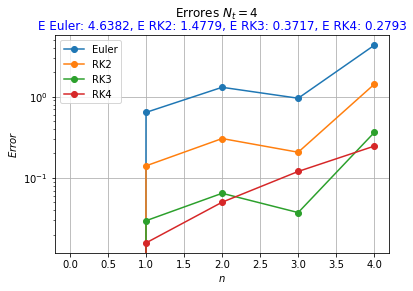

In [5]:
fig, ax1 = plt.subplots(1,1)
fig.suptitle('Errores $N_t=4$')
ax1.plot(e_eul, '-o', label='Euler')
ax1.plot(e_rk2, '-o', label='RK2')
ax1.plot(e_rk3, '-o', label='RK3')
ax1.plot(e_rk4, '-o', label='RK4')
ax1.set_title(Errores, color = 'blue')
ax1.set_yscale('log')
ax1.set_ylabel('$Error$')
ax1.set_xlabel('$n$')
ax1.legend()
ax1.grid()

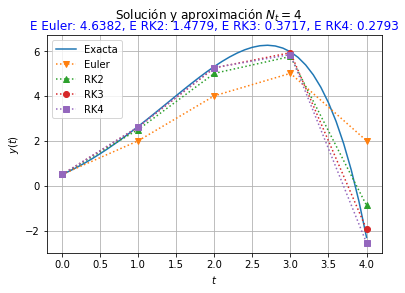

In [6]:
fig, ax1 = plt.subplots(1,1)
fig.suptitle('Solución y aproximación $N_t=4$')
ax1.plot(texact, yp1, label= 'Exacta')
ax1.plot(t, y_eul, ':v', label='Euler')
ax1.plot(t, y_rk2, ':^', label='RK2')
ax1.plot(t, y_rk3, ':o', label='RK3')
ax1.plot(t, y_rk4, ':s', label='RK4')
ax1.set_title(Errores, color = 'blue')
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend()
ax1.grid()

In [7]:
Nt = 8
a = 0
b = 4
ht = mesh(a, b, Nt)
y0 = 0.5

texact = np.arange(a, b+0.1, 0.1)
t = np.linspace(a, b, Nt+1)
y_eul = np.zeros(Nt+1)
y_rk2 = np. zeros (Nt +1)
y_rk3 = np. zeros (Nt +1)
y_rk4 = np. zeros (Nt +1)

y_eul [0]= y0
y_rk2 [0]= y0
y_rk3 [0]= y0
y_rk4 [0]= y0

Euler (f, t, y_eul , ht)
RK2 (f, t, y_rk2 , ht)
RK3 (f, t, y_rk3 , ht)
RK4 (f, t, y_rk4 , ht)

yp1 = Exacta(texact)
yp = Exacta (t)
e_eul = np.abs(yp - y_eul )
e_rk2 = np.abs(yp - y_rk2 )
e_rk3 = np.abs(yp - y_rk3 )
e_rk4 = np.abs(yp - y_rk4 )

n_error_eul = np.linalg.norm(e_eul , 2)
n_error_rk2 = np.linalg.norm(e_rk2 , 2)
n_error_rk3 = np.linalg.norm(e_rk3 , 2)
n_error_rk4 = np.linalg.norm(e_rk4 , 2)

Errores = 'E Euler: {:3.4f}, E RK2: {:3.4f}, E RK3: {:3.4f}, E RK4: {:3.4f}'.format(n_error_eul, n_error_rk2, n_error_rk3, n_error_rk4)

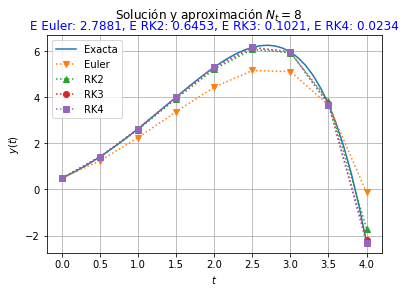

In [8]:
fig, ax1 = plt.subplots(1,1)
fig.suptitle('Solución y aproximación $N_t=8$')
ax1.plot(texact, yp1, label= 'Exacta')
ax1.plot(t, y_eul, ':v', label='Euler')
ax1.plot(t, y_rk2, ':^', label='RK2')
ax1.plot(t, y_rk3, ':o', label='RK3')
ax1.plot(t, y_rk4, ':s', label='RK4')
ax1.set_title(Errores, color = 'blue')
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend()
ax1.grid()

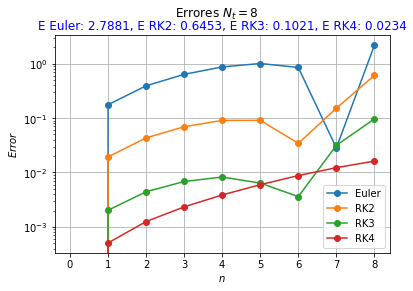

In [9]:
fig, ax1 = plt.subplots(1,1)
fig.suptitle('Errores $N_t=8$')
ax1.plot(e_eul, '-o', label='Euler')
ax1.plot(e_rk2, '-o', label='RK2')
ax1.plot(e_rk3, '-o', label='RK3')
ax1.plot(e_rk4, '-o', label='RK4')
ax1.set_title(Errores, color = 'blue')
ax1.set_yscale('log')
ax1.set_ylabel('$Error$')
ax1.set_xlabel('$n$')
ax1.legend()
ax1.grid()

In [10]:
Nt = 16
a = 0
b = 4
ht = mesh(a, b, Nt)
y0 = 0.5

texact = np.arange(a, b+0.1, 0.1)
t = np.linspace(a, b, Nt+1)
y_eul = np.zeros(Nt+1)
y_rk2 = np. zeros (Nt +1)
y_rk3 = np. zeros (Nt +1)
y_rk4 = np. zeros (Nt +1)

y_eul [0]= y0
y_rk2 [0]= y0
y_rk3 [0]= y0
y_rk4 [0]= y0

Euler (f, t, y_eul , ht)
RK2 (f, t, y_rk2 , ht)
RK3 (f, t, y_rk3 , ht)
RK4 (f, t, y_rk4 , ht)

yp1 = Exacta(texact)
yp = Exacta (t)
e_eul = np.abs(yp - y_eul )
e_rk2 = np.abs(yp - y_rk2 )
e_rk3 = np.abs(yp - y_rk3 )
e_rk4 = np.abs(yp - y_rk4 )

n_error_eul = np.linalg.norm(e_eul , 2)
n_error_rk2 = np.linalg.norm(e_rk2 , 2)
n_error_rk3 = np.linalg.norm(e_rk3 , 2)
n_error_rk4 = np.linalg.norm(e_rk4 , 2)

Errores = 'E Euler: {:3.4f}, E RK2: {:3.4f}, E RK3: {:3.4f}, E RK4: {:3.4f}'.format(n_error_eul, n_error_rk2, n_error_rk3, n_error_rk4)

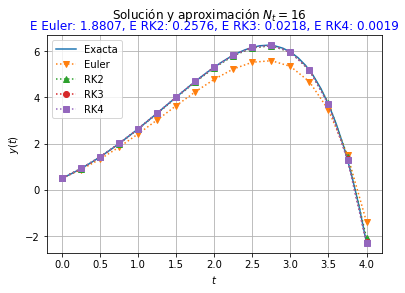

In [11]:
fig, ax1 = plt.subplots(1,1)
fig.suptitle('Solución y aproximación $N_t=16$')
ax1.plot(texact, yp1, label= 'Exacta')
ax1.plot(t, y_eul, ':v', label='Euler')
ax1.plot(t, y_rk2, ':^', label='RK2')
ax1.plot(t, y_rk3, ':o', label='RK3')
ax1.plot(t, y_rk4, ':s', label='RK4')
ax1.set_title(Errores, color = 'blue')
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend()
ax1.grid()

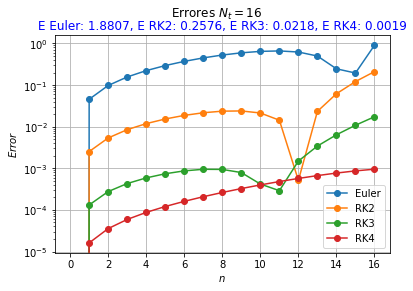

In [12]:
fig, ax1 = plt.subplots(1,1)
fig.suptitle('Errores $N_t=16$')
ax1.plot(e_eul, '-o', label='Euler')
ax1.plot(e_rk2, '-o', label='RK2')
ax1.plot(e_rk3, '-o', label='RK3')
ax1.plot(e_rk4, '-o', label='RK4')
ax1.set_title(Errores, color = 'blue')
ax1.set_yscale('log')
ax1.set_ylabel('$Error$')
ax1.set_xlabel('$n$')
ax1.legend()
ax1.grid()

In [13]:
Nt = 32
a = 0
b = 4
ht = mesh(a, b, Nt)
y0 = 0.5

texact = np.arange(a, b+0.1, 0.1)
t = np.linspace(a, b, Nt+1)
y_eul = np.zeros(Nt+1)
y_rk2 = np. zeros (Nt +1)
y_rk3 = np. zeros (Nt +1)
y_rk4 = np. zeros (Nt +1)

y_eul [0]= y0
y_rk2 [0]= y0
y_rk3 [0]= y0
y_rk4 [0]= y0

Euler (f, t, y_eul , ht)
RK2 (f, t, y_rk2 , ht)
RK3 (f, t, y_rk3 , ht)
RK4 (f, t, y_rk4 , ht)

yp1 = Exacta(texact)
yp = Exacta (t)
e_eul = np.abs(yp - y_eul )
e_rk2 = np.abs(yp - y_rk2 )
e_rk3 = np.abs(yp - y_rk3 )
e_rk4 = np.abs(yp - y_rk4 )

n_error_eul = np.linalg.norm(e_eul , 2)
n_error_rk2 = np.linalg.norm(e_rk2 , 2)
n_error_rk3 = np.linalg.norm(e_rk3 , 2)
n_error_rk4 = np.linalg.norm(e_rk4 , 2)

Errores = 'E Euler: {:3.4f}, E RK2: {:3.4f}, E RK3: {:3.4f}, E RK4: {:3.4f}'.format(n_error_eul, n_error_rk2, n_error_rk3, n_error_rk4)

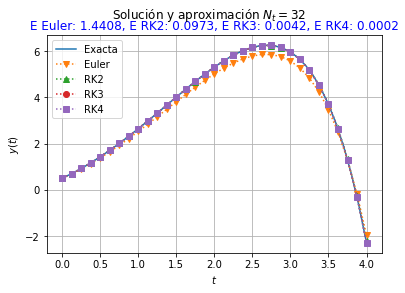

In [14]:
fig, ax1 = plt.subplots(1,1)
fig.suptitle('Solución y aproximación $N_t=32$')
ax1.plot(texact, yp1, label= 'Exacta')
ax1.plot(t, y_eul, ':v', label='Euler')
ax1.plot(t, y_rk2, ':^', label='RK2')
ax1.plot(t, y_rk3, ':o', label='RK3')
ax1.plot(t, y_rk4, ':s', label='RK4')
ax1.set_title(Errores, color = 'blue')
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend()
ax1.grid()

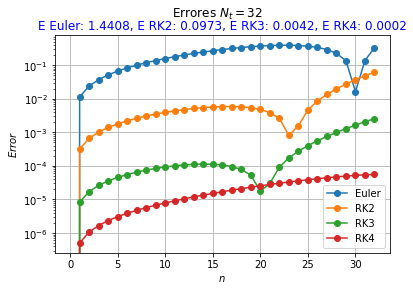

In [15]:
fig, ax1 = plt.subplots(1,1)
fig.suptitle('Errores $N_t=32$')
ax1.plot(e_eul, '-o', label='Euler')
ax1.plot(e_rk2, '-o', label='RK2')
ax1.plot(e_rk3, '-o', label='RK3')
ax1.plot(e_rk4, '-o', label='RK4')
ax1.set_title(Errores, color = 'blue')
ax1.set_yscale('log')
ax1.set_ylabel('$Error$')
ax1.set_xlabel('$n$')
ax1.legend()
ax1.grid()

In [16]:
e_eul

array([0.        , 0.01155077, 0.02400292, 0.03739687, 0.05176852,
       0.06714732, 0.08355407, 0.10099819, 0.11947441, 0.13895881,
       0.15940416, 0.18073423, 0.20283714, 0.22555736, 0.2486864 ,
       0.27195165, 0.29500331, 0.31739903, 0.33858583, 0.35787887,
       0.37443667, 0.38723201, 0.39501805, 0.39628869, 0.38923238,
       0.3716784 , 0.34103423, 0.29421282, 0.22754807, 0.13669673,
       0.01652459, 0.13902535, 0.33708575])